In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh')
import paramselect
import os
import fnmatch
def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches
comps = ['AL', 'NI', 'VA']
#phase = 'FCC_L12'
#configuration = ["NI", "NI", "NI", "AL", "VA"]
#ratios = [0.25, 0.25, 0.25, 0.25, 1]
phase = 'BCC_B2'
ratios = [0.5, 0.5, 1]
configuration = ["AL", ["AL", "NI"], "VA"]
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))

In [2]:
from paramselect import generate_parameter_file
generate_parameter_file('BCC_B2', 'B2', [['AL', 'NI', 'VA'], ['AL', 'NI', 'VA'], ['VA']], [0.5, 0.5, 1], datasets)

9 endmembers (6 distinct by symmetry)
ENDMEMBER: ('AL', 'AL', 'VA')
((1,), 'rss:', 0.0, 'AIC:', -inf)
1.0*GHSERAL + 9317.49855
ENDMEMBER: ('AL', 'NI', 'VA')
((T*log(T),), 'rss:', 14.988883894999999, 'AIC:', 175.26776657310174)
((T*log(T), T**2), 'rss:', 0.2873883389542129, 'AIC:', -75.802936347674901)
((T*log(T), T**2, 1/T), 'rss:', 0.0099866390517579038, 'AIC:', -288.81645914770121)
((T*log(T), T**2, 1/T, T**3), 'rss:', 0.0072673304269471536, 'AIC:', -307.1594405676077)
((T,), 'rss:', 0.0025696812500114125, 'AIC:', -379.69429855999584)
((1,), 'rss:', 173532.43540185422, 'AIC:', 786.16778754974746)
9.52839146299304e-8*T**3 + 0.00123463087381571*T**2 + 0.00087189801424814*T*log(T) + 1.31470574297718*T + 0.5*GHSERAL + 0.5*GHSERNI - 64435.2998227933 + 23095.2239240017/T
ENDMEMBER: ('AL', 'VA', 'VA')
((1,), 'rss:', 0.0, 'AIC:', -inf)
0.5*GHSERAL + 32865.03128
ENDMEMBER: ('NI', 'NI', 'VA')
((1,), 'rss:', 0.0, 'AIC:', -inf)
1.0*GHSERNI + 9060.32543
ENDMEMBER: ('NI', 'VA', 'VA')
((1,), 'rss:'

In [3]:
parameters = paramselect.fit_formation_energy(comps, phase, configuration, datasets)
print(parameters)

([YS], 'rss:', 448807694.77074623, 'AIC:', 41.844210114473789)
([YS, YS*Z], 'rss:', 1.3234889800848443e-23, 'AIC:', -101.35837144511169)
([YS, YS*Z, YS*Z**2], 'rss:', 1.7205356741102976e-22, 'AIC:', -94.228472730188614)
([YS, YS*Z, YS*Z**2, YS*Z**3], 'rss:', 2.6469779601696886e-22, 'AIC:', -91.366906898003705)
{T**3*YS*Z: 0, YS*Z: 282467.75856000005, YS*Z/T: 0, T**2*YS: 0, T**3*YS*Z**2: 0, T*YS*Z*log(T): 0, T**3*YS*Z**3: 0, T*YS*Z: 0, YS*Z**3/T: 0, YS*Z**2/T: 0, YS: -78017.67895999999, YS*Z**3: 0.0, T*YS*log(T): 0, T*YS*Z**3: 0, T**2*YS*Z: 0, YS/T: 0, YS*Z**2: 0.0, T*YS: 0, T*YS*Z**3*log(T): 0, T**2*YS*Z**3: 0, T*YS*Z**2*log(T): 0, T*YS*Z**2: 0, T**2*YS*Z**2: 0, T**3*YS: 0}


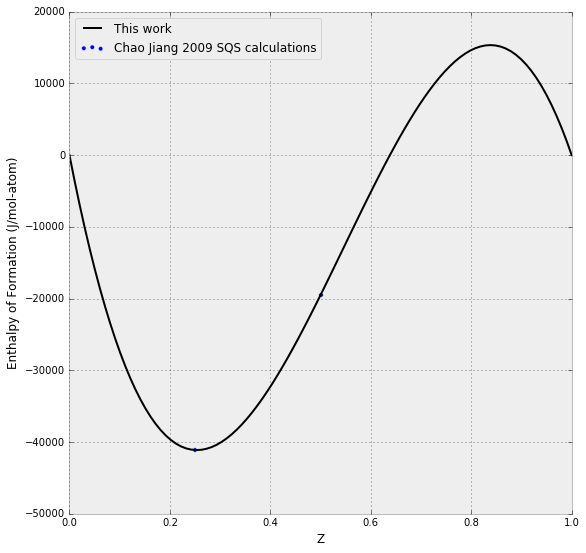

In [4]:
#datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))
paramselect.plot_parameters(comps, phase, configuration, ratios, datasets, parameters, plots=[('Z', 'HM_FORM')])